# DBA3713 Analytics for Risk Management

## Assignment 1 - Credit lending problem with logistic regression and its variants

### Due Date: Week 4 before class

## Assignment Overview

* The goal of this assignment is to take a step-by-step approach to solving the credit lending problem on a more realistic data set. 

* In this assignment, we will start from the ETL (Extract, Transform, Load) and data cleaning, followed by building logistic models, and finally, how to produce a credit decision rule. We will also explore variants of the logistic regression
* A dataset containing the full loan data has been uploaded on Luminus. 
* Please answer the questions and write the code/results in the blanks/empty cells. 
* 45 pts in total

In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# pandas display option
pd.options.display.max_columns = 999

# Part 1. Data pre-processing 

<a id="Section_1.1"></a>
### 1.1 Load the data 
* Read data by pandas and name it as "loans". This step has been done for you.

In [2]:
# Read data by pandas and name it as "loans". This step has been done for you.

loans = pd.read_csv('lendingclub_full_data_set_no_id.csv')
loans.head(n=10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,16000,60 months,12.74,361.93,C,C1,Aircraft Maintenance Technician,1 year,MORTGAGE,80000.0,Not Verified,Current,n,NaN,home_improvement,Home improvement,112xx,NY,4.20,0.0,9/1/92,680,684,0.0,54.0,51.0,5.0,1.0,476,15.9,17.0,w,1/1/18,10/1/17,674,670,0.0,54.0,1,Joint App,153000.0,5.51,Not Verified,0.0,0.0,1601.0,0.0,1.0,0.0,1.0,14.0,1125.0,14.0,0.0,1.0,274.0,14.0,3000.0,0.0,0.0,3.0,2.0,320.0,524.0,47.6,0.0,0.0,161.0,292.0,14.0,14.0,0.0,38.0,54.0,2.0,54.0,0.0,2.0,2.0,2.0,5.0,6.0,4.0,11.0,2.0,5.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,11100.0,1601.0,1000.0,8100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,60 months,28.69,788.84,F,F1,Checker,5 years,MORTGAGE,75200.0,Verified,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,306xx,GA,23.28,0.0,4/1/06,685,689,4.0,27.0,NaN,9.0,0.0,4697,54.0,23.0,w,NaN,6/1/17,694,690,0.0,87.0,1,Individual,NaN,NaN,NaN,0.0,225.0,152844.0,6.0,4.0,3.0,4.0,3.0,51108.0,90.0,1.0,2.0,4321.0,54.0,9000.0,0.0,0.0,4.0,7.0,16982.0,2250.0,52.0,0.0,0.0,105.0,127.0,5.0,3.0,2.0,5.0,NaN,3.0,NaN,0.0,4.0,4.0,5.0,5.0,15.0,4.0,6.0,2.0,9.0,NaN,0.0,0.0,5.0,96.0,0.0,0.0,0.0,163461.0,55805.0,9000.0,57061.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,36 months,5.32,150.58,A,A1,Principal,8 years,RENT,95000.0,Source Verified,Current,n,NaN,vacation,Vacation,850xx,AZ,13.93,0.0,10/1/95,710,714,0.0,24.0,NaN,11.0,0.0,10671,25.8,22.0,f,1/1/18,12/1/17,694,690,0.0,47.0,1,Individual,NaN,NaN,NaN,0.0,0.0,108472.0,0.0,2.0,0.0,1.0,18.0,97801.0,60.0,0.0,3.0,6272.0,32.0,41300.0,0.0,0.0,0.0,4.0,9861.0,29229.0,26.7,0.0,0.0,124.0,249.0,13.0,13.0,4.0,13.0,24.0,21.0,24.0,1.0,6.0,6.0,7.0,7.0,6.0,9.0,12.0,6.0,11.0,0.0,0.0,0.0,0.0,90.9,14.3,

* Show how many rows and columns such dataset has.

In [3]:
# Show how many rows and columns this dataset has
print(loans.shape)

(24999, 132)


<a id="Section_1.2"></a>
### 1.2 Outcome variable 
The event of interest is whether a loan ends up in default or not. The variable "*loan_status*" best describes the information. We firstly take a close look at it.
* List all the unique values of "*loan_status*" and count how many are they in the data set

In [4]:
# list all the unique values of loan status and count the volume of them
loans.loan_status.value_counts()

Current                                                12063
Fully Paid                                              9733
Charged Off                                             2557
Late (31-120 days)                                       336
In Grace Period                                          174
Late (16-30 days)                                        101
Does not meet the credit policy. Status:Fully Paid        28
Does not meet the credit policy. Status:Charged Off        5
Default                                                    2
Name: loan_status, dtype: int64

|* For simplicity, let us only include the loans with status is one of the following:
 * "Fully Paid"
 * "Charged Off"
 * "Late (31-120 days)"
 * "Default"
 

<div class="alert alert-warning">
<b>Suggestion: </b> Any deletion of rows could be followed by 'reset_index' to avoid such indexing issues later in the processing.

</div>

In [5]:
# Reset the "loans" dataset by only including the rows whose "loan_status" belongs to one of the following: 
# 'Fully Paid','Late (31-120 days)','Default' and 'Charged Off'
# Suggestion: any deletion of rows could be followed by reset_index to avoid such indexing issues later in the processing
n_loans_before = loans.shape[0]
keep_status = ['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Default']
loans = loans[loans['loan_status'].isin(keep_status)].reset_index(drop=True)
n_loans_after = loans.shape[0]

print('No. of loans before removal of other loan status:', n_loans_before)
print('No. of loans after removal of other loan status:', n_loans_after)

No. of loans before removal of other loan status: 24999
No. of loans after removal of other loan status: 12628


* Convert loan status to binary values.

  *  Rule: A “good” loan = 1 (i.e., positive) and a “bad” loan = 0 (i.e., negative). A good loan means one that is fully paid and a bad one means otherwise.

In [6]:
# Check if target definition is computed correctly
loans_copy = loans[['loan_status']].copy(deep=True)
loans_copy['loan_status_transformed'] = np.where(loans_copy['loan_status'] == 'Fully Paid', 1, 0)

# If target definition is correct, the mean value of `Fully Paid` should equate to 1, while the rest will be 0.
display(loans_copy.groupby(['loan_status'])['loan_status_transformed'].mean().sort_values())

del loans_copy

loan_status
Charged Off           0.0
Default               0.0
Late (31-120 days)    0.0
Fully Paid            1.0
Name: loan_status_transformed, dtype: float64

In [7]:
# Check loan portfolio composition
print('Loan portfolio composition:\n')
display(loans.loan_status.value_counts(normalize=True)) # about 77% of loans are good loans

# Convert loan status to binary values.
# Rule: A “good” loan = 1 (i.e., positive) and a “bad” loan = 0 (i.e., negative). 
# A good loan means one that is fully paid and a bad one means otherwise.
loans['loan_status'] = np.where(loans['loan_status'] == 'Fully Paid', 1, 0)

Loan portfolio composition:



Fully Paid            0.770748
Charged Off           0.202487
Late (31-120 days)    0.026608
Default               0.000158
Name: loan_status, dtype: float64

* We have finisihed the pre-processing the loan status information. List again all the unique values of "loan_status" and count the volume of them



In [8]:
# List again all the unique values of "loan_status" and count the volume of them
loans['loan_status'].value_counts()

# As per above breakdown, 77% of the loans should be good loans (i.e. equals to 1)


1    9733
0    2895
Name: loan_status, dtype: int64

<a id="Section_1.3"></a>
### 1.3 Feature Manipulation
Although as aforementioned we have 132 features, we select 26 out of them here for illustration. We may make further refinement as a further exercise of feature selection.  

In [9]:
# We consider the following pool of features
    
feature_pool = ['fico_range_high',
 'fico_range_low',
 'acc_now_delinq',
 'installment',
 'collections_12_mths_ex_med',
 'tax_liens',
 'verification_status',
 'revol_bal',
 'home_ownership',
 'total_acc',
 'annual_inc',
 'delinq_2yrs',
 'pub_rec_bankruptcies',
 'purpose',
 'loan_amnt',
 'open_acc',
 'revol_util',
 'sub_grade',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'inq_last_6mths',
 'pub_rec',
 'term',
 'dti','int_rate',
  'addr_state']

outcome = 'loan_status'

* Reset "loans" dataset by only including the features in the pool

In [10]:
# reset "loans" dataset by only including the features in the pool
loans = loans[feature_pool +[outcome]]

* Identify which columns are not numerical type

In [11]:
# List the types of all fields
print('Data types:')
display(loans.dtypes)

Data types:


fico_range_high                 int64
fico_range_low                  int64
acc_now_delinq                float64
installment                   float64
collections_12_mths_ex_med    float64
tax_liens                     float64
verification_status            object
revol_bal                       int64
home_ownership                 object
total_acc                     float64
annual_inc                    float64
delinq_2yrs                   float64
pub_rec_bankruptcies          float64
purpose                        object
loan_amnt                       int64
open_acc                      float64
revol_util                    float64
sub_grade                      object
delinq_amnt                   float64
chargeoff_within_12_mths      float64
inq_last_6mths                float64
pub_rec                       float64
term                           object
dti                           float64
int_rate                      float64
addr_state                     object
loan_status 

In [12]:
# OPTIONAL: check unique values for each categorical column
cat_col = [
    'verification_status', 
    'purpose', 
    'sub_grade', 
    'term', 
    'addr_state', 
    'home_ownership'
]

for col in cat_col:
    # cat_value_dict[col] = loans[col].unique()
    print("\n\nCategory:", col)
    display(loans[col].value_counts(normalize=True, dropna=False))
    print("="*30)



Category: verification_status


Source Verified    0.362607
Verified           0.335445
Not Verified       0.301948
Name: verification_status, dtype: float64



Category: purpose


debt_consolidation    0.596769
credit_card           0.209218
home_improvement      0.060500
other                 0.053611
major_purchase        0.021935
small_business        0.013145
car                   0.012195
medical               0.009582
vacation              0.008156
moving                0.006652
house                 0.005306
wedding               0.002376
renewable_energy      0.000475
educational           0.000079
Name: purpose, dtype: float64



Category: sub_grade


C1    0.063985
B3    0.063430
B4    0.062718
B5    0.059629
B2    0.055274
C3    0.054720
C2    0.052978
C4    0.052740
C5    0.051156
B1    0.049335
A5    0.039436
A4    0.037932
D1    0.037377
D2    0.035318
A1    0.029221
D3    0.028983
D4    0.027637
A3    0.027162
A2    0.026212
D5    0.022886
E1    0.022569
E2    0.018213
E3    0.017342
E4    0.014412
E5    0.012908
F1    0.009424
F2    0.005939
F3    0.005385
F4    0.004197
F5    0.004039
G1    0.002376
G2    0.002138
G4    0.001346
G3    0.001109
G5    0.000475
Name: sub_grade, dtype: float64



Category: term


 36 months    0.75491
 60 months    0.24509
Name: term, dtype: float64



Category: addr_state


CA    0.148638
TX    0.082436
NY    0.080852
FL    0.066677
IL    0.038882
NJ    0.036823
GA    0.034447
PA    0.033735
NC    0.031834
OH    0.030409
VA    0.028746
MI    0.025103
MD    0.024628
AZ    0.024073
MA    0.023678
WA    0.022886
CO    0.022094
MN    0.017738
NV    0.016788
IN    0.015917
MO    0.015442
TN    0.014492
CT    0.013858
WI    0.012433
LA    0.012116
AL    0.011878
SC    0.011878
OR    0.011720
KY    0.009107
OK    0.009028
UT    0.008869
KS    0.008394
AR    0.008315
HI    0.004831
RI    0.004751
NH    0.004435
NM    0.003959
WV    0.003722
MS    0.003484
AK    0.003168
DE    0.002455
MT    0.002376
DC    0.002376
NE    0.002296
WY    0.002296
SD    0.002059
VT    0.001980
ME    0.001029
ND    0.000554
ID    0.000317
Name: addr_state, dtype: float64



Category: home_ownership


MORTGAGE    0.498575
RENT        0.397529
OWN         0.103500
OTHER       0.000238
NONE        0.000158
Name: home_ownership, dtype: float64

At this stage, you will find the following variables to be categorical: `home_ownership`, `term`, `sub_grade`, `addr_state`, `verification_status`, and `purpose`

* Pre-process the categorical variables by dealing with the outliers so that each value is not too rare in the data
  *  Proprocessing rules: 
     * For the variable `home_ownership`, rename the values of 'ANY and 'NONE' to 'OTHER'
     * For the variable `purpose`, rename the values of 'renewable_energy' and 'educational' to 'other'
     * For the variable `sub_grade`, rename the values of 'G1', 'G2', 'G3', 'G4', 'G5' to 'G'


In [13]:
# For all values of the 'home_ownership' variable that are 'ANY' or 'NONE', rename them to 'OTHER'
loans['home_ownership'] = loans['home_ownership'].replace({
    'ANY': 'OTHER',
    'NONE': 'OTHER'
})

# For all values of the 'purpose' variable that are 'renewable_energy' or 'educational', rename them to 'other'
loans['purpose'] = loans['purpose'].replace({
    'renewable_energy': 'other',
    'educational': 'other'
})

# For all values of the 'sub_grade' variable that are 'G1', 'G2', 'G3', 'G4', or 'G5', rename them to 'G'
grade_G = ['G'+str(i+1) for i in range(5)]
loans['sub_grade'] = np.where(loans['sub_grade'].isin(grade_G), 'G', loans['sub_grade'])


* Transform categorical variables into numerical values

* Rules:
 * For every categorical variable with k alternatives, please replace it with k-1 dummy variables using one-hot encoding.
 * For example, '*home_ownership*' take value from four values: '**OWN**', '**RENT**', '**NONE**', '**MORTGAGE**', and '**OTHER**'. Create four dummies for '*home_ownership*' using one-hot encoding. Then drop the column "*home_ownership*", plus one of the four dummies to avoid the **multicollinearity** issue. Finally, integrate the three dummies to dataset. 
 * For other categorical variables, you may follow a similar process. 
 * You may find the method <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">get_dummies()</a> useful to automate the process.
 


In [14]:
# For every categorical variable with k alternatives, please replace it with k-1 dummy variables using one-hot encoding.
category_pool = ['home_ownership', 'term', 'sub_grade', 'verification_status','purpose','addr_state']
loans = pd.get_dummies(loans, columns=category_pool, prefix_sep=':', drop_first=True)

Now that you have finished the transformation, 
 * Please make sure that all of them are of numerical type.
 * Also, count and print the number of features now after transformation

In [15]:
# Count the number of features now after transformation
# All fields should be of numerical types by this stage.
print('No. of features:',loans.shape[1]-1) # 116 features & 1 outcome
display(loans.info()) # 16 float64 types, 4 int64, 96 uint8


No. of features: 116
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12628 entries, 0 to 12627
Columns: 117 entries, fico_range_high to addr_state:WY
dtypes: float64(16), int32(1), int64(4), uint8(96)
memory usage: 3.1 MB


None

* Check for missing values: count how many missing values there are in every column of the dataframe *loans*.

In [16]:
# Count how many missing values there are in every column of the dataframe loans.
loans.isnull().sum().to_frame('n_missing').query('n_missing > 0')

,n_missing
collections_12_mths_ex_med,1
tax_liens,1
pub_rec_bankruptcies,8
revol_util,8
chargeoff_within_12_mths,1
dti,1


At this stage, you will find that the only variable with missing values is `tax_liens`, `revol_util`, `dti`, `collections_12_mths_ex_med`, `chargeoff_within_12_mths` and `pub_rec_bankruptcies`

* Fill in the missing values: 
 * First, use its **median**  fill the missing values of those fields. You may find the the method <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">DataFrame.fillna()</a> useful to automate the process.
 * Then, check again whether there are any missing values

<div class="alert alert-warning">
<b>Note: </b> When you use fillna(), be careful with <B>replace</B> parameter because you need to modify the original variable but not a review.    
</div>

In [17]:
variables_to_complete = ['tax_liens','revol_util', 'dti', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies']

# Process missing values: use the median value of each field to fill in the missing values
for col in variables_to_complete:
    loans[col] = loans[col].fillna(loans[col].median())
    



In [18]:
# check again whether there are any missing values
loans.isnull().sum().to_frame('n_missing').query('n_missing > 0')

,n_missing


While we do not proceed further here, it is worth mentioning that there are further ways to "cleverly" select the features. For further read, you may find the discussion in <a href="https://scikit-learn.org/stable/modules/feature_selection.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Feature Selection</a> useful.

### 1.4 Data Splitting
* Randomly split the pre-processed loan data into training, validation and test set.
 * First, randomly shuffle the data using `np.random.RandomState(seed=42).permutation(n)`.  The random seed has been set to `seed = 42` to make sure the result is replicatable. 
   * The data shuffling has been done for you.
 * Second, assign each row to the train/validation/test set according to the following rule:
   * For rows 0-6999 (inclusive): assign them to the training set
   * For rows 7000-9999 (inclusive): assign them to the validation set
   * For the rest of the rows: assign them to the test set
  


In [19]:
# Randomly shuffle the data. This step has been done for you.
n = len(loans)
random_index = np.random.RandomState(seed=42).permutation(n)
loans = loans.iloc[random_index]
loans.reset_index(drop=True, inplace=True)

In [20]:
# Split the pre-processed loan data into training, validation and test set
# Suggestion: any deletion of rows could be followed by reset_index to avoid such indexing issues later in the processing
train = loans.iloc[:7000].reset_index(drop=True)
validation = loans.iloc[7000:10000].reset_index(drop=True)
test = loans.iloc[10000:loans.shape[0]+1].reset_index(drop=True)

### 1.5 Data re-scaling
* Scale the training, validation, and test data sets. 
 * First, further split the training, validation, and test data sets into `X_train`, `X_val`, `X_test`, `y_train`, `y_val` and `y_test`
 * Then, scale the feature information off all three datasets based on the mean and standard deviations of the training set 
   
This step is similar to what we did in the lecture. Note that scaling is important in improving the numerical stability.

<div class="alert alert-warning">
<b>Note: </b> In later parts of this assignment, we will also be using the unscaled version of the feature data. So please keep a copy of the unscaled features using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">copy()</a> method. (Or, you can keep the scaling coefficients so that you can transform the scaled data back to the unscaled ones.)
</div>

In [21]:
# Remove target column to create feature only dataset: 'X_train', 'X_val', and 'X_test', respectively 
X_train = train.drop(columns=outcome)
X_val = validation.drop(columns=outcome)
X_test = test.drop(columns=outcome)

# Keep a copy of the unscaled features using the ".copy()" method, and name them 'X_train_unscale', 'X_val_unscale', and 'X_test_unscale', respectively
X_train_unscale = X_train.copy(deep=True)
X_val_unscale = X_val.copy(deep=True)
X_test_unscale = X_test.copy(deep=True)

# Scale 'X_train', 'X_val', and 'X_test' data using the mean and standard deviation of the training set. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # fit scaler according to training dataset

X_train.loc[:,:] = scaler.transform(X_train)
X_val.loc[:,:] = scaler.transform(X_val)
X_test.loc[:,:] = scaler.transform(X_test)


# Store target column as y-variables in the following datasets: 'y_train', 'y_val', and 'y_test'
y_train = train[outcome]
y_val = validation[outcome]
y_test = test[outcome]



In [22]:
# verify X_ datasets have been scaled (mean=0, sd=1):
for df in [X_train, X_val, X_test]:
    display(df.describe())

,fico_range_high,fico_range_low,acc_now_delinq,installment,collections_12_mths_ex_med,tax_liens,revol_bal,total_acc,annual_inc,delinq_2yrs,pub_rec_bankruptcies,loan_amnt,open_acc,revol_util,delinq_amnt,chargeoff_within_12_mths,inq_last_6mths,pub_rec,dti,int_rate,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,term: 60 months,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,9.531385e-16,1.251449e-15,-3.291018e-16,-9.728726e-17,-1.321919e-16,-3.008149e-16,2.640745e-18,-1.106496e-16,-1.779241e-16,1.093887e-16,1.240896e-15,5.351275e-17,-6.136203e-16,-1.564293e-17,-1.122704e-15,-2.063127e-15,3.088165e-16,3.835821e-16,2.090391e-16,-4.586490e-16,-1.807968e-16,7.309867e-16,-2.216640e-16,-4.651517e-16,-5.865943e-17,2.526447e-15,-8.785909e-16,1.046782e-16,-1.700394e-15,-3.162629e-16,-5.780931e-16,2.451531e-16,4.251996e-16,-3.430906e-16,5.707974e-16,1.040239e-15,8.128419e-18,-1.415534e-17,3.474681e-16,-2.980949e-17,-1.351617e-16,-8.876471e-16,2.555099e-16,1.743050e-16,1.768109e-16,3.632650e-16,3.893750e-16,4.509488e-17,6.867324e-16,-6.555907e-16,1.072991e-16,5.457856e-16,2.643580e-16,-5.444177e-16,-2.953510e-16,-4.561748e-16,-1.332268e-17,9.487649e-17,2.868816e

,fico_range_high,fico_range_low,acc_now_delinq,installment,collections_12_mths_ex_med,tax_liens,revol_bal,total_acc,annual_inc,delinq_2yrs,pub_rec_bankruptcies,loan_amnt,open_acc,revol_util,delinq_amnt,chargeoff_within_12_mths,inq_last_6mths,pub_rec,dti,int_rate,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,term: 60 months,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.009757,0.009766,-0.003742,0.003912,-0.011828,-0.009960,-0.018363,0.003047,-0.006296,-0.028796,-0.016803,0.009337,0.012176,-0.016363,0.001304,0.048279,0.006745,-0.026330,0.001404,0.020287,-0.004601,0.001252,0.009940,0.018911,0.013502,-0.017878,-0.013649,-0.022484,-0.009575,-0.010614,0.003386,0.017490,-0.006161,0.012088,-0.007604,0.005457,-0.001284,0.014079,0.025996,-0.021523,0.021903,-0.030843,0.027118,0.016717,0.008920,0.065384,0.012628,-0.021743,0.010589,-0.008747,-0.058858,-0.026712,0.026883,-0.016426,-0.011871,0.005550,0.018972,-0.023691,0.006595,-0.019442,-0.010817,0.019113,0.001731,0.005108,0.007861,0.022182,-0.017506,-0.032055,-0.034257,0.022544,0.012521,-0.015981,0.017884,-0.003089,0.021938,-0.033075,0.002884,0.041551,-2.070640e-02,-0.000974,0.012478,-0.008334,-0.005869,0.015047,-0.012683,-0.011558,-0.014094,-0.018806,-0.052976,0.027020,0.030475,0.001881,0.000545,-0.001782,0.011328,0.0

,fico_range_high,fico_range_low,acc_now_delinq,installment,collections_12_mths_ex_med,tax_liens,revol_bal,total_acc,annual_inc,delinq_2yrs,pub_rec_bankruptcies,loan_amnt,open_acc,revol_util,delinq_amnt,chargeoff_within_12_mths,inq_last_6mths,pub_rec,dti,int_rate,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,term: 60 months,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY
count,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2.628000e+03,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000,2628.000000
mean,-0.005793,-0.005797,-0.009424,0.011744,0.011677,0.021961,0.020928,0.005264,0.005899,-0.003875,-0.021453,0.004233,0.024557,0.000761,0.201822,-0.005013,-0.002378,-0.008950,0.006584,-0.005284,-0.002322,0.001957,0.021953,-0.030145,-0.004681,-0.032227,0.006713,0.001456,-0.013087,0.008870,0.047857,0.011620,-0.023320,-0.008477,-0.007023,-0.000064,0.011270,0.025449,-0.038177,-0.011099,0.069644,-0.039059,0.007662,0.013909,-0.007639,-0.005906,0.008409,0.014904,0.009461,-0.035622,-0.018539,-0.015131,0.019462,-0.018628,-0.007486,0.001105,-0.061048,0.021983,-0.006078,0.014157,0.024386,0.030852,-0.013928,0.022264,-0.020795,0.015411,0.044178,0.006702,-0.009533,0.052045,0.013782,-0.001770,0.003606,0.027720,-0.008023,0.026085,0.004762,-0.007356,-0.002322,-0.022845,0.016217,0.007699,-0.016233,0.000760,-0.004506,-0.002614,-0.000039,0.015874,0.006411,0.022018,0.007765,-0.020720,0.006594,-2.673567e-02,0.003033,0.01

### 1.6  Summary
* Please print the following:
  * The first five instances for training, validation, and test data sets, respectively
  * The percentages of all outcome levels for each data set
  * The shapes of the split datasets
  * Feature names

In [23]:
# Store features and outcome in dictionary
labels = ['train','val','test']
X_dataset = [X_train, X_val, X_test]
y_dataset = [y_train, y_val, y_test]

from collections import defaultdict
datadict = defaultdict(dict)
for label, X_df, y_df in zip(labels, X_dataset, y_dataset):
    datadict[label]['features'] = X_df
    datadict[label]['outcome'] = y_df

# Print the first five instances for training, validation, and test data sets, 
# respectively, as well as the percentages of all outcome levels
for label in datadict.keys():
    print('Dataset:', label)
    display(datadict[label]['features'].head(5))
    
    print('\nOutcome composition:')
    display(datadict[label]['outcome'].value_counts(normalize=True))
    print('='*30)
    

# Print the shapes of the split datasets
print('Shape of split datasets:\n')
for label in datadict.keys():
    print(f"X_{label} shape: {datadict[label]['features'].shape}")
    # display(datadict[label]['features'].shape)

# Print the feature names
print('='*30)
print('Features used in model:\n')
print(X_train.columns.tolist())


Dataset: train


,fico_range_high,fico_range_low,acc_now_delinq,installment,collections_12_mths_ex_med,tax_liens,revol_bal,total_acc,annual_inc,delinq_2yrs,pub_rec_bankruptcies,loan_amnt,open_acc,revol_util,delinq_amnt,chargeoff_within_12_mths,inq_last_6mths,pub_rec,dti,int_rate,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,term: 60 months,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY
0,0.632344,0.632380,-0.069231,-0.572028,-0.12065,-0.143156,-0.266140,-0.698740,-0.236857,-0.361387,-0.361985,-0.562610,-0.279704,0.337553,-0.022203,-0.070773,-0.711809,-0.382539,0.057829,-1.582449,-0.020706,2.946503,-0.806569,-0.570972,-0.162922,-0.172818,-0.199524,-0.205261,-0.230449,-0.242242,-0.25456,-0.255196,-0.255196,-0.260864,-0.23825,-0.23992,-0.234884,-0.227686,-0.197971,-0.195227,-0.162922,-0.176725,-0.148984,-0.148482,-0.135934,-0.125769,-0.118541,-0.115403,-0.095298,-0.082217,-0.083093,-0.069863,-0.058655,-0.090607,-0.757691,-0.709305,1.924656,-1.217846,-0.253604,-0.07388,-0.148482,-0.092981,-0.083093,-0.236235,-0.116668,-0.086511,-0.046341,-0.112834,-0.096813,-0.148984,-0.41442,-0.152454,-0.116037,-0.046341,-0.047864,-0.268588,-0.188015,-0.065606,-0.020706,-0.203744,-0.123999,-0.092197,-0.098305,-0.108872,-0.157766,-0.160597,-0.033826,-0.161064,-0.140232,-0.119774,-0.054855,-0.050775,-0.180557,-0.026736,-0.046341,-0.063372,-0.193247,-0.067767,-0.13702,3.333276,-0.181398,-0.095298,-0.106839,-0.183072,-0.066695,-0.112183,-0.041439,-0.126353,-0.295742,-0.095298,-0.171057,-0.050775,-0.146968,-0.11087,-0.069863,-0.04934
1,-0.166254,-0.166253,-0.069231,-0.507838,-0.12065,-0.143156,-0.669757,0.310097,-0.283218,-0.361387,4.751825,-0.503175,-1.040139,-1.984582,-0.022203,-0.070773,-0.711809,3.161835,-0.467777,-1.538099,-0.020706,2.946503,-0.806569,-0.570972,6.137918,-0.172818,-0.199524,-0.205261,-0.230449,-0.242242,-0.25456,-0.255196,-0.255196,-0.260864,-0.23825,-0.23992,-0.234884,-0.227686,-0.197971,-0.195227,-0.162922,-0.176725,-0.148984,-0.148482,-0.135934,-0.125769,-0.118541,-0.115403,-0.095298,-0.082217,-0.083093,-0.069863,-0.058655,-0.090607,1.319800,-0.709305,-0.519573,-1.217846,-0.253604,-0.07388,6.734806,-0.092981,-0.083093,-0.236235,-0.116668,-0.086511,-0.046341,-0.112834,-0.096813,-0.148984,-0.41442,-0.152454,-0.116037,-0.046341,-0.047864,3.723170,-0.188015,-0.065606,-0.020706,-0.203744,-0.123999,-0.092197,-0.098305,-0.108872,-0.157766,-0.160597,-0.033826,-0.161064,-0.140232,-0.119774,-0.054855,-0.050775,-0.180557,-0.026736,-0.046341,-0.063372,-0.193247,-0.067767,-0.13702,-0.300005,-0.181398,-0.095298,-0.106839,-0.183072,-0.066695,-0.112183,-0.041439,-0.126353,-0.295742,-0.095298,-0.171057,-0.050775,-0.146968,-0.11087,-0.069863,-0.04934
2,-0.645413,-0.64543


Outcome composition:


1    0.773143
0    0.226857
Name: loan_status, dtype: float64

Dataset: val


,fico_range_high,fico_range_low,acc_now_delinq,installment,collections_12_mths_ex_med,tax_liens,revol_bal,total_acc,annual_inc,delinq_2yrs,pub_rec_bankruptcies,loan_amnt,open_acc,revol_util,delinq_amnt,chargeoff_within_12_mths,inq_last_6mths,pub_rec,dti,int_rate,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,term: 60 months,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY
0,-0.166254,-0.166253,-0.069231,1.356335,-0.12065,-0.143156,0.211018,0.057888,-0.209039,-0.361387,-0.361985,1.279858,0.100513,-0.270921,-0.022203,-0.070773,-0.711809,-0.382539,0.109135,-1.322687,-0.020706,-0.339385,-0.806569,-0.570972,-0.162922,-0.172818,5.011926,-0.205261,-0.230449,-0.242242,-0.25456,-0.255196,-0.255196,-0.260864,-0.238250,-0.23992,-0.234884,-0.227686,-0.197971,-0.195227,-0.162922,-0.176725,-0.148984,-0.148482,-0.135934,-0.125769,-0.118541,-0.115403,-0.095298,-0.082217,-0.083093,-0.069863,-0.058655,-0.090607,1.319800,-0.709305,1.924656,-1.217846,-0.253604,-0.07388,-0.148482,-0.092981,-0.083093,-0.236235,-0.116668,-0.086511,-0.046341,-0.112834,-0.096813,-0.148984,-0.41442,-0.152454,-0.116037,-0.046341,-0.047864,-0.268588,-0.188015,-0.065606,-0.020706,-0.203744,-0.123999,-0.092197,-0.098305,-0.108872,-0.157766,-0.160597,-0.033826,-0.161064,-0.140232,8.349076,-0.054855,-0.050775,-0.180557,-0.026736,-0.046341,-0.063372,-0.193247,-0.067767,-0.13702,-0.300005,-0.181398,-0.095298,-0.106839,-0.183072,-0.066695,-0.112183,-0.041439,-0.126353,-0.295742,-0.095298,-0.171057,-0.050775,-0.146968,-0.110870,-0.069863,-0.04934
1,-1.124572,-1.124612,-0.069231,-1.318610,-0.12065,-0.143156,-0.490217,-1.035019,-0.969374,-0.361387,-0.361985,-1.335257,-0.850030,-0.063957,-0.022203,-0.070773,-0.711809,-0.382539,-0.637658,-0.112577,-0.020706,-0.339385,1.239819,-0.570972,-0.162922,-0.172818,-0.199524,-0.205261,-0.230449,-0.242242,-0.25456,-0.255196,-0.255196,-0.260864,4.197264,-0.23992,-0.234884,-0.227686,-0.197971,-0.195227,-0.162922,-0.176725,-0.148984,-0.148482,-0.135934,-0.125769,-0.118541,-0.115403,-0.095298,-0.082217,-0.083093,-0.069863,-0.058655,-0.090607,1.319800,-0.709305,-0.519573,-1.217846,-0.253604,-0.07388,-0.148482,-0.092981,-0.083093,4.233074,-0.116668,-0.086511,-0.046341,-0.112834,-0.096813,-0.148984,-0.41442,-0.152454,-0.116037,-0.046341,-0.047864,-0.268588,-0.188015,-0.065606,-0.020706,-0.203744,-0.123999,-0.092197,-0.098305,-0.108872,-0.157766,-0.160597,-0.033826,-0.161064,-0.140232,-0.119774,-0.054855,-0.050775,5.538430,-0.026736,-0.046341,-0.063372,-0.193247,-0.067767,-0.13702,-0.300005,-0.181398,-0.095298,-0.106839,-0.183072,-0.066695,-0.112183,-0.041439,-0.126353,-0.295742,-0.095298,-0.171057,-0.050775,-0.146968,-0.110870,-0.069863,-0.04934
2,0.792063,0.792


Outcome composition:


1    0.762333
0    0.237667
Name: loan_status, dtype: float64

Dataset: test


,fico_range_high,fico_range_low,acc_now_delinq,installment,collections_12_mths_ex_med,tax_liens,revol_bal,total_acc,annual_inc,delinq_2yrs,pub_rec_bankruptcies,loan_amnt,open_acc,revol_util,delinq_amnt,chargeoff_within_12_mths,inq_last_6mths,pub_rec,dti,int_rate,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,term: 60 months,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY
0,3.507297,3.507460,-0.069231,1.029748,-0.12065,-0.143156,-0.317179,-0.782810,-0.375942,-0.361387,-0.361985,1.042120,-0.850030,-1.119473,-0.022203,-0.070773,0.285721,-0.382539,-1.336566,-1.732393,-0.020706,-0.339385,-0.806569,-0.570972,-0.162922,-0.172818,-0.199524,-0.205261,-0.230449,-0.242242,-0.25456,-0.255196,-0.255196,-0.260864,-0.23825,-0.23992,-0.234884,-0.227686,-0.197971,-0.195227,-0.162922,-0.176725,-0.148984,-0.148482,-0.135934,-0.125769,-0.118541,-0.115403,-0.095298,-0.082217,-0.083093,-0.069863,-0.058655,-0.090607,-0.757691,-0.709305,1.924656,-1.217846,-0.253604,-0.07388,-0.148482,-0.092981,-0.083093,-0.236235,-0.116668,-0.086511,-0.046341,8.862587,-0.096813,-0.148984,-0.414420,-0.152454,-0.116037,-0.046341,-0.047864,-0.268588,-0.188015,-0.065606,-0.020706,-0.203744,-0.123999,-0.092197,-0.098305,-0.108872,-0.157766,-0.160597,-0.033826,-0.161064,-0.140232,-0.119774,-0.054855,-0.050775,-0.180557,-0.026736,-0.046341,-0.063372,-0.193247,-0.067767,-0.13702,-0.300005,-0.181398,-0.095298,-0.106839,-0.183072,-0.066695,-0.112183,-0.041439,-0.126353,-0.295742,-0.095298,-0.171057,-0.050775,-0.146968,-0.11087,-0.069863,-0.04934
1,0.472624,0.472654,-0.069231,1.823569,-0.12065,-0.143156,1.061758,-0.278391,0.458572,-0.361387,-0.361985,1.636464,-1.040139,0.941888,-0.022203,-0.070773,-0.711809,-0.382539,-0.403929,-0.919317,-0.020706,-0.339385,-0.806569,-0.570972,-0.162922,-0.172818,-0.199524,-0.205261,-0.230449,4.128103,-0.25456,-0.255196,-0.255196,-0.260864,-0.23825,-0.23992,-0.234884,-0.227686,-0.197971,-0.195227,-0.162922,-0.176725,-0.148984,-0.148482,-0.135934,-0.125769,-0.118541,-0.115403,-0.095298,-0.082217,-0.083093,-0.069863,-0.058655,-0.090607,-0.757691,1.409831,-0.519573,0.821122,-0.253604,-0.07388,-0.148482,-0.092981,-0.083093,-0.236235,-0.116668,-0.086511,-0.046341,-0.112834,-0.096813,-0.148984,-0.414420,-0.152454,-0.116037,-0.046341,-0.047864,-0.268588,-0.188015,-0.065606,-0.020706,-0.203744,-0.123999,-0.092197,-0.098305,-0.108872,-0.157766,-0.160597,-0.033826,-0.161064,-0.140232,-0.119774,-0.054855,-0.050775,-0.180557,-0.026736,-0.046341,-0.063372,-0.193247,-0.067767,-0.13702,-0.300005,-0.181398,-0.095298,-0.106839,-0.183072,-0.066695,-0.112183,-0.041439,-0.126353,3.381330,-0.095298,-0.171057,-0.050775,-0.146968,-0.11087,-0.069863,-0.04934
2,-0.325974,-0.325979


Outcome composition:


1    0.773973
0    0.226027
Name: loan_status, dtype: float64

Shape of split datasets:

X_train shape: (7000, 116)
X_val shape: (3000, 116)
X_test shape: (2628, 116)
Features used in model:

['fico_range_high', 'fico_range_low', 'acc_now_delinq', 'installment', 'collections_12_mths_ex_med', 'tax_liens', 'revol_bal', 'total_acc', 'annual_inc', 'delinq_2yrs', 'pub_rec_bankruptcies', 'loan_amnt', 'open_acc', 'revol_util', 'delinq_amnt', 'chargeoff_within_12_mths', 'inq_last_6mths', 'pub_rec', 'dti', 'int_rate', 'home_ownership:OTHER', 'home_ownership:OWN', 'home_ownership:RENT', 'term: 60 months', 'sub_grade:A2', 'sub_grade:A3', 'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2', 'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1', 'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5', 'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4', 'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2', 'sub_grade:E3', 'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1', 'sub_grade:F2', 'sub_grade:F3', 'sub_grade:F4', 'sub_grade:F

# Part 2. Predicting with (basic) Logistic Regression 

Let us divide this step into three stage: model training, decision criterion selection, and performance evaluation. The test data should be **only** used in the last stage. 

### 2.1 Model training
* Fit a LogisticRegression model using the training data. 
 * Please use the scikit-learn package <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Logistic Regression</a>
 * The training parameters we use are: 
   * `penalty="none"` (It means there is no regularization) 
   *  `solver="newton-cg"` (It means we use the newton-cg method to solve the MLE problem. This is a slightly more advanced algorithm than what we used in class.)
 * Print the trained coefficients

In [24]:
#Fit a LogisticRegression model using the training data
lr_model = LogisticRegression(penalty='none', solver='newton-cg')
lr_model.fit(X_train, y_train) 

lr_coef_tab = pd.DataFrame({'feature': X_train.columns.tolist() + ['Intercept'], 
            'coefficient': np.append(lr_model.coef_, lr_model.intercept_).flatten()
            }).sort_values('coefficient').set_index('feature')


# Print the estimated coefficients
print("Logistic regression model coefficients:")
with pd.option_context('display.max_rows', None):
    display(lr_coef_tab)


Logistic regression model coefficients:


,coefficient
feature,
fico_range_low,-128.496892
installment,-0.690336
sub_grade:C4,-0.578114
sub_grade:D4,-0.543772
sub_grade:C3,-0.528761
sub_grade:D2,-0.517156
sub_grade:C5,-0.509304
sub_grade:E1,-0.475690
sub_grade:D1,-0.474151


### 2.2 Decision criterion

In this assignment, we will choose the decision criterion based on the validation data according to the expected payoff objective. For simplicity, let us assume that the payoff from a good loan is loan amount times multiplied by the interest rate, and the loss from a bad loan is the loan amount itself. (That is, there is no recovery from a bad loan.) 

* Please report the following quantities:
  * The average interest rate (in percentage number) in the **UNSCALED** training, validation, and test datasets
  * The average loan amount (in USD) in the **UNSCALED** training, validation, and test datasets

In [25]:
# Print the average interest rate and loan amount in the unscaled training, validation, and test datasets
print(f"Average interest rate in unscaled training dataset: {X_train_unscale['int_rate'].mean():.2f}%")
print(f"Average loan amount in unscaled training dataset: {X_train_unscale['loan_amnt'].mean():,.2f} USD\n")

print(f"Average interest rate in unscaled validation dataset: {X_val_unscale['int_rate'].mean():.2f}%")
print(f"Average loan amount in unscaled validation dataset: {X_val_unscale['loan_amnt'].mean():,.2f} USD\n")

print(f"Average interest rate in unscaled test dataset: {X_test_unscale['int_rate'].mean():.2f}%")
print(f"Average loan amount in unscaled test dataset: {X_test_unscale['loan_amnt'].mean():,.2f} USD\n")

Average interest rate in unscaled training dataset: 13.52%
Average loan amount in unscaled training dataset: 14,233.03 USD

Average interest rate in unscaled validation dataset: 13.62%
Average loan amount in unscaled validation dataset: 14,311.58 USD

Average interest rate in unscaled test dataset: 13.50%
Average loan amount in unscaled test dataset: 14,268.64 USD



*  Write a Python function `get_EP` that calculates, for every given threshold, the expected payoff from a randomly drawn borrower based on the average interest rates/loan amounts 
    * The Python function should allow the user to specify whether to perform the calculation on validation or test data
    * Please set the profit parameter "P" to be the average interest times times the average loan amount
    * Please set the loss parameter "L" to be the average loan amount
    * You can write additional functions if needed, and use/modify the codes provided in the lecture


In [26]:
# You can use the functions below (if needed)

def get_data(evaluate_on):
    ###########
    # Get the validation/training data, depending on the data mode
    # Input: evaluate_on is either 'test' or 'validate', meaning whether the evaluation is performed on the validation or test data
    # Output: the appropriate feature and outcome data as a tuple
    ###########
    
    if evaluate_on == 'test':
        X,y,X_unscale = X_test, y_test, X_test_unscale
    elif evaluate_on == 'validate':
        X,y,X_unscale = X_val, y_val, X_val_unscale
    else:
        print('Error: evaluate_on must be either "test" or "validate"')
        X, y, X_unscale  = (None, None, None)
        
    return X, y, X_unscale
    
    

def get_cm(z, reg_model, evaluate_on):
    
    ###########
    # Get the confusion matrix of given the threshold, classifier and the dataset
    # Input: z is the threshold
    #        reg_model is the sklearn classifier 
    #        evaluate_on is either 'test' or 'validate', meaning whether the confusion matrix is evaluated on the
    #        validation data or test data
    # Output: the confusion matrix
    ###########
    

    # Get the appropriate feature and outcome data    
    X,y, _ = get_data(evaluate_on)
    
    
    # If prob for data set > threshold predict 1
    preds = np.where(reg_model.predict_proba(X)[:,1] > z, 1, 0) # For each borrower, if prob > z, assign default = 1                                  
    
    # # Print the acceptance rate. Uncomment if needed.
    # print('Number of loans accepted: ', np.sum(preds) )
    # print('Number of loans rejected: ', np.sum(1-preds) )
    
    # create confusion matrix based on Z threshold
    cm = confusion_matrix(y, preds,labels=[1, 0], sample_weight=None) # confusion matrix 
    
    return cm



def get_ratios(cm):
    ###########
    # Get the relavant ratios given a confusion matrix
    # Input: cm is a 2*2 confusion matrix
    # Output: Accuracy, TPR, FNR, TNR, and FPR
    ###########
    
    
    TP = cm[0][0] # True Positives                                                                                          
    FN = cm[0][1] # False Positives                                                                                          
    FP = cm[1][0] # True Negatives                                                                                          
    TN = cm[1][1] # False Negatives                                                                                          
        
    TPR = TP/(TP+FN) # True Positive Rate (sensitivity/recall)                                                                                       
    FNR = FN/(TP+FN) # False Negative Rate (miss rate)                                                                                      
    TNR = TN/(TN+FP) # True Negative Rate (specificity)                                                                                      
    FPR = FP/(TN+FP) # False Positive Rate (fall-out) 
    
    Accuracy = (TP+TN)/(TP+FN+FP+TN)
    
    return Accuracy, TPR, FNR, TNR, FPR



In [27]:
def avg_loan_stats(X_unscale):
    """Calculate average interest rate and loan amount from unscaled dataset"""
    avg_int_rate = X_unscale['int_rate'].mean()
    avg_loan_amnt = X_unscale['loan_amnt'].mean()
    return avg_int_rate, avg_loan_amnt
    

In [28]:
def get_EP (z, reg_model, evaluate_on):
    
    ###########
    # Evaluate the (realized) expected payoff given the threshold, classifier, and based on the validation/test data set
    # Input: z is the threshold
    #        reg_model is a sklearn classifier
    #        evaluate_on is either 'test' or 'validate', meaning whether the confusion matrix is generated from the...
    #        validation data or test data
    # Output: The (realized) expected payff from an average borrower
    # Note: The gain and loss parameters P and L should be estimated from the validation/test data
    ###########
    
    # Get the appropriate feature and outcome data    
    X, y, X_unscale = get_data(evaluate_on)

    # Please fill in your codes here. 
    cm = get_cm(z, reg_model, evaluate_on)
    Accuracy, TPR, FNR, TNR, FPR = get_ratios(cm)

    # Calculate profit (P) and loss (L) from validation/test data
    avg_int_rate, avg_loan_amnt = avg_loan_stats(X_unscale)
    P = avg_int_rate/100 * avg_loan_amnt 
    L = avg_loan_amnt
    p_good_loan = y.mean() # proportion of good loans in val/test data 
    p_bad_loan = 1 - p_good_loan # proportion of bad loans in val/test data 
    
    # Calculate Expected Payoff (EP)
    EP = (P*p_good_loan*TPR) - (L*p_bad_loan*FPR)
    
    return EP


*  Complete the following two tasks: 
    * Plot the expected payoff curve of the logistic regression model.
    * Please also find the optimal threshold and store it in the variable `z_optimal`
    * Both tasks should be based on the **validation** data

In [29]:
# You can directly use the functions below (if needed)

# Let the threshold Z range from 0.5 to 1. 
zrange_default = np.arange(0.5,1,0.001) # a grid search for the threshold 


def EP_curve(reg_model, evaluate_on, zrange=zrange_default):
    
    ###########    
    # Evaluate and plot the (realized) expected payoff curve. Also, we obtain the threshold based on the curve.
    # Input: reg_model is the classifier of interest
    #        evaluate_on is either 'test' or 'validate', 
    #        meaning whether the evaluation is based on validation or test data
    #        zrange is the range that the treshold Z takes value in
    # Output: The optimal threshold
    ###########

    # We calculate the expected payoff as a function of Z
    EP_lr = np.array([get_EP(z, reg_model, evaluate_on=evaluate_on)  for z in zrange]) #The expected payoff curve for the logistic regression
    EP_rg = EP_lr[0] + zrange * (EP_lr[-1] - EP_lr[0]) #The expected payoff curve for the random guess predictor

    plt.plot(zrange, EP_rg,linestyle='--',color = 'black', label='Random Predction')
    plt.plot(zrange , EP_lr,label='Logistic Regression')

    plt.xlabel('Z')
    plt.ylabel('Expected payoff')
    plt.legend()
    plt.show()


    # Analysis of the optimal threshold
    z_optimal = zrange [np.argmax(EP_lr)] # get index position of max EP value

    print('-------------')
    print('The optimal Z is: ', z_optimal)
    print('Evaluated on: the %s data set' %evaluate_on)
    print('   The maximual expected payoff is: ', np.max (EP_lr) )
    print('   The confusion matrix under the optimal Z is: ')
    print(get_cm(z_optimal, reg_model, evaluate_on = evaluate_on))
    Accuracy, TPR, FNR, TNR, FPR = get_ratios (get_cm(z_optimal, reg_model, evaluate_on = evaluate_on))
    print('   The relavant ratios under the optimal Z are: ')
    print('   Accuracy rate:', Accuracy, ' TPR:', TPR, ' FPR:',  FPR)
    print('-------------')
    
    return z_optimal
    

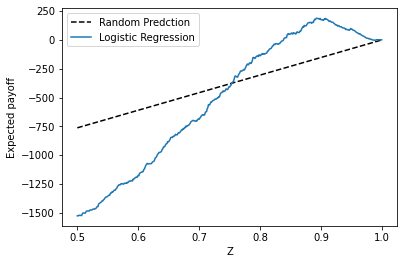

-------------
The optimal Z is:  0.8920000000000003
Evaluated on: the validate data set
   The maximual expected payoff is:  187.47496298801678
   The confusion matrix under the optimal Z is: 
[[ 641 1646]
 [  48  665]]
   The relavant ratios under the optimal Z are: 
   Accuracy rate: 0.43533333333333335  TPR: 0.28027984258854394  FPR: 0.06732117812061711
-------------


In [30]:
# Plot the expected payoff curve of the logistic regression model and print 'z_optimal', 
# both based on the validation data
z_optimal_lr = EP_curve(lr_model, 'validate', zrange=zrange_default)

### 2.3 Performance evaluation

#### 2.3.1  The performance of the logistic regression as a classifier
*  (Possibly building on the lecture codes) Report the MLE loss function values on training, validation, and test datasets

In [31]:
# You can directly use the functions below (if needed)

def loss_evaluation(reg_model):
    
    # y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
    # validation set and test set using the fitted logistic regression model

    y_train_pred=reg_model.predict_proba(X_train)
    y_val_pred=reg_model.predict_proba(X_val)
    y_test_pred=reg_model.predict_proba(X_test)

    # Calculate maximum likelihood for training set, validation set, and test set

    mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
    mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
    mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

    # Calculate loss functions from maximum likelihoods
    loss_function_training = np.negative(np.sum(mle_vector_train)/len(y_train))
    loss_function_val = np.negative(np.sum(mle_vector_val)/len(y_val))
    loss_function_test = np.negative(np.sum(mle_vector_test)/len(y_test))
    
    return loss_function_training, loss_function_val, loss_function_test




In [32]:
# Print the MLE loss function values on training, validation, and test datasets
loss_lr = loss_evaluation(lr_model)
print(f'Loss (train): {loss_lr[0]:.5f}')
print(f'Loss (val): {loss_lr[1]:.5f}')
print(f'Loss (test): {loss_lr[2]:.5f}')
print('\n Some degree of overfitting is present, since val & test loss is higher than training loss.')


Loss (train): 0.47261
Loss (val): 0.50347
Loss (test): 0.49720

 Some degree of overfitting is present, since val & test loss is higher than training loss.


* (Possibly building on the lecture codes) Report the AUC score for the logistic regression classifier  (based on the **test** data).

In [33]:
# You can directly use the functions below (if needed)

def get_AUC(reg_model, evaluate_on = 'test'):
    
    ###########
    # Plot the ROC curve of a given classifier and the data to evaluate on. Also, calculate the AUC measure.
    # Input: reg_model is a sklearn classifier 
    #        evaluate_on is either 'test' or 'validate', meaning whether the confusion matrix is evaluated on the
    #        validation data or test data. By default, the ROC curve is evaluated on the test data.
    # Output: The AUC measure. Also, plot the curve.
    ###########
    
    # Get the appropriate feature and outcome data    
    X,y, _ = get_data(evaluate_on)
    
    # Get the predicted probablities from the current model and from random predictions
    model_prob = reg_model.predict_proba(X)
    model_prob = model_prob[:, 1]
    ns_prob=[0 for _ in range(len(y))]
    
    # Get the AUC scores
    ns_auc=roc_auc_score(y, ns_prob)
    model_auc = roc_auc_score(y,model_prob)
    
    
    return model_auc


In [34]:
# Print the AUC measure of the logistic regression on the test data
auc_lr = get_AUC(lr_model, evaluate_on = 'test')
print('AUC (test):',auc_lr)



AUC (test): 0.6863182794844545


#### 2.3.1  The performance of the loan acceptance rule

Let us consider the loan acceptance rule determined by the logistic regression classifier with the threshold `z_optimal`. The evaluation should be based on the **test** data

* Evaluate and print the confusion matrix 

In [35]:
# Evaluate and print the confusion matrix (based on the test data)
cm_lr = get_cm(z_optimal_lr, lr_model, 'test') # z_optimal is obtained from the validation data
print(cm_lr)

[[ 589 1445]
 [  56  538]]


* Evaluate the expected payoff of the loan based on the average interest rates and loan amounts

In [36]:
# Evaluate the expected payoff of the loan based on the average interest rates and loan amounts in the test data
EP_lr = get_EP(z_optimal_lr, lr_model, 'test')
print(f'{EP_lr:.2f}')

127.61


# Part 3. Improving the Prediction using Regularization

Let us use L1 regularization to improve the prediction model and ultimately, the loan acceptance decision. 

* Let the regularization parameter Lambda range from 5 to 145. For each lambda, fit a logistic regression with L1 regularization. Plot three curves to answer the following three questions:
  * (1) How does the number of non-zero coefficients change with respect to lambda?
  * (2) How does the MLE loss function value change with respect to lambda for the training, validation, and test data, respectively? (You can plot three curves on the same graph)
  * (3) How does the AUC score change with respect to lambda for the validation and test, respectively? (You can plot two curves on the same graph)
  

  
* The training parameters we use are: 
   * `penalty="l1"` (It means we use L1 regularization) 
   *  `solver="liblinear"` (It means we use the liblinear method as the solver, which is slightly more specialized to the training problem with L1 regularization)


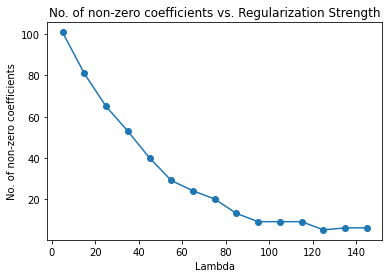

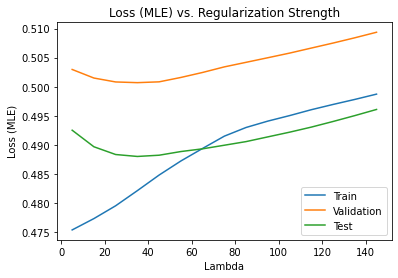

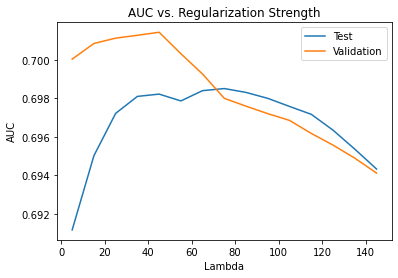

In [37]:
# Let the regularization parameter Lambda range from 5 to 145. (We use LAMBDA to store its range.) 
# For each lambda, fit a logistic regression with L1 regularization. 
# Plot three curves to answer the following three questions:
# (1) How does the number of non-zero coefficients change with respect to lambda?
# (2) How does the MLE loss function value change with respect to lambda for the training, validation, and test data, respectively? (You can plot three curves on the same graph)
# (3) How does the AUC score change with respect to lambda for the validation and test, respectively? (You can plot two curves on the same graph)

# The range of lambda values
LAMBDA = np.arange(5,155, 10)

coef = []
loss = []
auc = {
    'Validation':[],
    'Test':[],
}

# fit lasso regression with each lambda param
for lamda_ in LAMBDA:#LAMBDA:
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1/lamda_)
    lasso_model.fit(X_train, y_train)
    
    # calculate no. of non-zero coefs
    n_coef = (lasso_model.coef_ != 0).sum() 
    coef.append(n_coef)
    
    # calculate MLE loss
    _loss = loss_evaluation(lasso_model) # loss_function_training, loss_function_val, loss_function_test
    loss.append(_loss)
    
    # calculate AUC
    auc_val = get_AUC(lasso_model, evaluate_on='validate')
    auc_test = get_AUC(lasso_model, evaluate_on='test')
    auc['Validation'].append(auc_val)
    auc['Test'].append(auc_test)
    
    
# Plot the number of non-zero coefficients for the l1-regularized logistic regression as lambda changes
plt.plot(LAMBDA, coef, marker='o')
plt.xlabel('Lambda')
plt.ylabel('No. of non-zero coefficients')
plt.title('No. of non-zero coefficients vs. Regularization Strength')
plt.axis('tight');

# Plot the likelihood loss function values (on training, validation, and test data sets) for the l1-regularized logistic regression as lambda changes
pd.DataFrame(loss, index=LAMBDA, columns=['Train','Validation','Test']).plot()
plt.xlabel('Lambda')
plt.ylabel('Loss (MLE)')
plt.title('Loss (MLE) vs. Regularization Strength')
plt.axis('tight');

# Plot the AUC measures for the l1-regularized logistic regression as lambda changes
pd.DataFrame.from_records(auc, index=LAMBDA).plot()
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.title('AUC vs. Regularization Strength')
plt.axis('tight');

* Suppose somebody has determined that the optimal regularization parameter is `lambda_optimal` = 40. What is the optimal threshold Z that obtains the highest expected payoff on the **validation** set? 

Lasso model coefficients:



,coefficient
feature,
int_rate,-0.289740
dti,-0.230029
term: 60 months,-0.202930
home_ownership:RENT,-0.109283
open_acc,-0.100628
sub_grade:C4,-0.058043
delinq_2yrs,-0.053889
sub_grade:E3,-0.040154
addr_state:AR,-0.036827



Expected payoff curve:


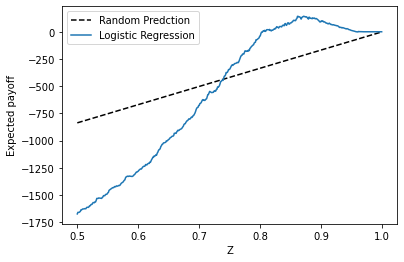

-------------
The optimal Z is:  0.8710000000000003
Evaluated on: the validate data set
   The maximual expected payoff is:  142.68157879512148
   The confusion matrix under the optimal Z is: 
[[ 528 1759]
 [  42  671]]
   The relavant ratios under the optimal Z are: 
   Accuracy rate: 0.39966666666666667  TPR: 0.23087013554875382  FPR: 0.05890603085553997
-------------

Optimal threshold using L1: 0.87100


In [38]:
# Suppose somebody has determined that the optimal regularization parameter is lambda_optimal = 40. 
lambda_optimal = 40
lasso_model.set_params(C=1/lambda_optimal)
lasso_model.fit(X_train, y_train)

# Non-zero coefficients in lasso_model
lasso_coef_tab = pd.DataFrame({
    "feature": X_train.columns.tolist() + ['Intercept'],
    "coefficient": np.append(lasso_model.coef_, lasso_model.intercept_).ravel()
}).sort_values('coefficient').query('coefficient != 0')
print('Lasso model coefficients:\n')
display(lasso_coef_tab.set_index('feature'))


# What is the optimal threshold Z that obtains the highest expected payoff on the validation set? 
# Save it in the variable 'z_optimal_l1' and print its value
print('\nExpected payoff curve:')
z_optimal_l1 = EP_curve(lasso_model, 'validate', zrange_default)
print(f'\nOptimal threshold using L1: {z_optimal_l1:.5f}')


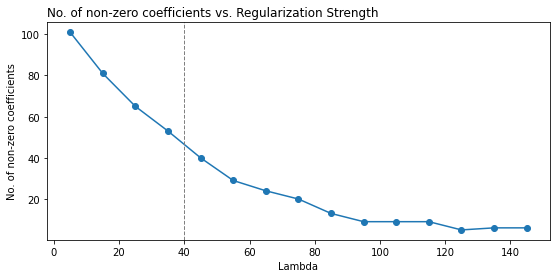

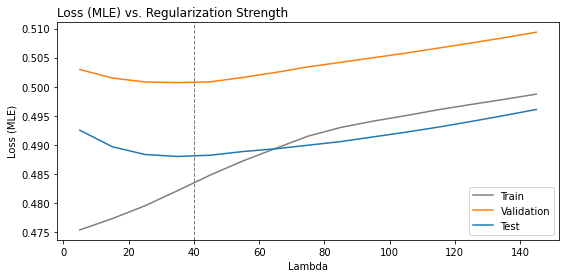

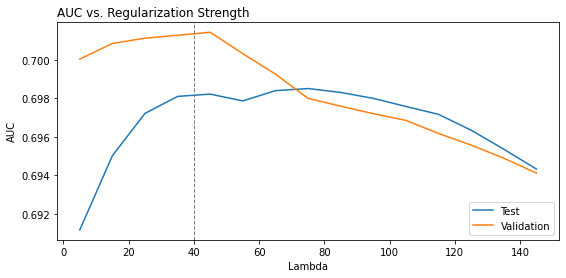

In [39]:
# Plot MLE Loss and AUC curves with lambda=40 markings
colordict = {"Train": "#7f7f7f", # grey
             "Validation":"#ff7f0e", # orange
             "Test": "#1f77b4"} # blue
# config plot
plt.rcParams["figure.figsize"] = (9,4) # figsize

# color mapping
colordict = {"Train": "#7f7f7f", # grey
             "Validation":"#ff7f0e", # orange
             "Test": "#1f77b4"} # blue

# No. of non-zero coefs
plt.plot(LAMBDA, coef, marker='o')
plt.xlabel('Lambda')
plt.ylabel('No. of non-zero coefficients')
plt.title('No. of non-zero coefficients vs. Regularization Strength', loc='left')
plt.axvline(lambda_optimal, ls='--', lw=1, color='gray')
plt.axis('tight');

# MLE Loss
pd.DataFrame(loss, index=LAMBDA, columns=['Train','Validation','Test']).plot.line(color=colordict)
plt.xlabel('Lambda')
plt.ylabel('Loss (MLE)')
plt.title('Loss (MLE) vs. Regularization Strength', loc='left')
plt.axvline(lambda_optimal, ls='--', lw=1, color='gray')
plt.legend(loc='lower right')
plt.axis('tight');

# Plot the AUC 
pd.DataFrame.from_records(auc, index=LAMBDA).plot.line(color=colordict)
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.title('AUC vs. Regularization Strength', loc='left')
plt.axvline(lambda_optimal, ls='--', lw=1, color='gray')
plt.legend(loc='lower right')
plt.axis('tight');

* Evaluate the prediction model on the **test** data set using the following metrics:
   * AUC score of the classifier
   * Confusion matrix (given the previously chosen threshold)
   * Expected payoff (given the previously chosen threshold)

In [40]:
# Evaluate the prediction model on the test data using the following metrics:
# (1) AUC score of the classifier
# (2) Confusion matrix (given the previously chosen threshold 'z_optimal_l1')
# (3) Expected payoff (given the previously chosen threshold 'z_optimal_l1')

# Print MLE loss
print("MLE Loss:", loss_evaluation(lasso_model))

# Print the AUC score of the regualized logistics classifier on the test data
print('Test AUC (lambda=40):', get_AUC(lasso_model,'test'))

# Print the confusion matrix of the regualized logistics classifier on the test data (given the previously chosen threshold 'z_optimal_l1')
print('Confusion Matrix (lambda=40):\n', get_cm(z_optimal_l1, lasso_model, 'test'))

# print the expected off on the test data (given the previously chosen threshold 'z_optimal_l1')
print('Expected payoff:', get_EP(z_optimal_l1, lasso_model, 'test'))


MLE Loss: (0.4834662733987887, 0.5007025258938135, 0.4880054154548058)
Test AUC (lambda=40): 0.6984330356995057
Confusion Matrix (lambda=40):
 [[ 491 1543]
 [  38  556]]
Expected payoff: 153.52029652633718
